In [1]:
import networkx as nx

In [2]:
import random

In [17]:
import numpy as np
N_task = 10
mat = np.random.randint(2, size=(N_task, N_task))
#np.random.randint(2, size=10)


In [18]:
mat

array([[0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]])

In [21]:
dag = nx.DiGraph(mat)

/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


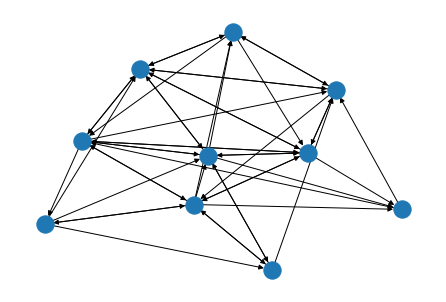

In [22]:
nx.draw(dag)

In [23]:
nx.is_directed_acyclic_graph(DAG)

True

In [26]:
lower_mat = np.tril(mat, k=-1)

In [31]:
print(mat)
print(lower_mat)

[[0 0 1 0 0 1 0 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 0]
 [0 1 0 0 1 1 1 0 0 0]
 [1 1 0 0 1 1 1 1 1 0]
 [0 1 0 1 1 0 1 0 1 0]
 [0 1 0 1 0 1 1 1 0 0]
 [1 1 1 1 1 0 0 0 1 1]
 [0 1 1 1 1 1 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 0 0 0]
 [0 1 0 1 0 1 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]]


In [32]:
dag_low = nx.DiGraph(lower_mat)

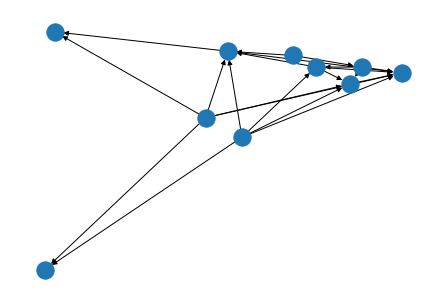

In [35]:
nx.draw(dag_low)

In [34]:
dag_low.remove_edges_from(
        # Remove all edges with weight of 0 since we have no placeholder for "this edge doesn't exist"
        [edge for edge in dag_low.edges() if dag_low.get_edge_data(*edge)['weight'] == '0.0']
    )
nx.relabel_nodes(dag_low, lambda idx: idx, copy=False)
for (u, v, w) in dag_low.edges(data=True):
    if w['weight'] > 0:
        w['weight'] = 1

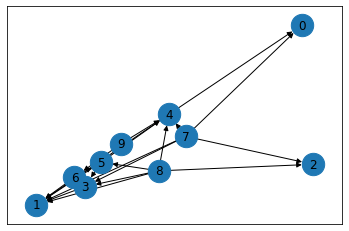

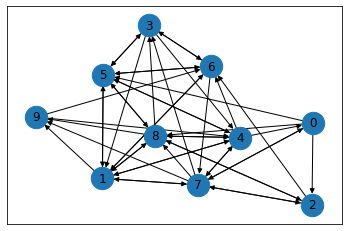

In [44]:
import matplotlib.pyplot as plt
nx.draw_networkx(dag_low,with_labels=True,node_size=500)


nx.draw_networkx(dag,with_labels=True,node_size=500)


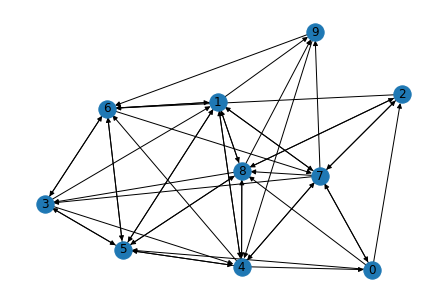

In [46]:
nx.draw(dag, with_labels = True)

/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/jeongsooha/.virtualenvs/reinforce/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


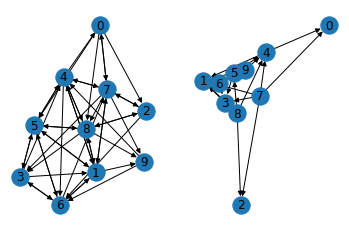

In [48]:
plt.subplot(121)
nx.draw(dag, with_labels = True)
plt.subplot(122)
nx.draw(dag_low, with_labels = True)

In [50]:
np.array(dag)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
nx.to_numpy_matrix(dag)

matrix([[0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
        [0., 1., 0., 0., 1., 1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 1., 1., 1., 0.],
        [0., 1., 0., 1., 1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 1., 1.],
        [0., 1., 1., 1., 1., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]])

In [100]:
t = nx.to_numpy_matrix(dag_low)
print(t)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]]


In [101]:
a = np.array([1,2,3,4])
b = np.array([])
print(a,b)

[1 2 3 4] []


In [102]:
b = a
print(b)

[1 2 3 4]


In [103]:
b = np.squeeze(b)

In [128]:
b
tt = []
print(tt)

[]


In [129]:
for i in range(len(dag_low)):
    print(list(np.nonzero(t[i])[1]))
    nz = list(np.nonzero(t[i])[1])
    if len(nz) > 0 :
        tt.append(nz)

[]
[]
[]
[1]
[0, 1]
[1, 3, 4]
[1, 3, 5]
[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[4, 6]


In [130]:
tt

[[1], [0, 1], [1, 3, 4], [1, 3, 5], [0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [4, 6]]